## Explainable AI

- **Black box AI**: no understanding of decision-making
- **Explainable AI**: understand model's inner workings

### Student Admission Prediction

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('admission_data.csv')

# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                498 non-null    float64
 5   CGPA               500 non-null    float64
 6   Chance of Admit    500 non-null    float64
 7   Accept             500 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [2]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Accept
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Handle missing values
imputer = SimpleImputer(strategy="mean")
df[['LOR']] = imputer.fit_transform(df[['LOR']])

# Step 2: Select features and target (classification)
X = df.drop(['Accept'], axis=1)
y = df['Accept']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Neural Networks

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=(1000,1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy of Neural Network: {acc}")

Accuracy of Neural Network: 0.78


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [5]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

# Train the model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train_scaled, y_train)

# Predict using the test set 
y_pred = tree_model.predict(X_test_scaled)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {acc:.2f}")

Accuracy of Decision Tree: 1.00


In [6]:
# Decision Tree Rules

from sklearn.tree import export_text

# Ensure you're using the DecisionTreeClassifier model
rules = export_text(tree_model, feature_names=list(X_train.columns))
print(rules)

|--- Chance of Admit <= -0.21
|   |--- class: 0
|--- Chance of Admit >  -0.21
|   |--- class: 1



In [7]:
# training ver 1

model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, y_train)

# Extract the rules
rules = export_text(model, feature_names=list(X_train.columns))
print(rules)

y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

|--- Chance of Admit <= 0.69
|   |--- class: 0
|--- Chance of Admit >  0.69
|   |--- class: 1

Accuracy: 1.00


In [8]:
# training ver 2

model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, y_train)

# Extract the rules
rules = export_text(model, feature_names=list(X_train.columns))
print(rules)

y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

|--- Chance of Admit <= 0.69
|   |--- class: 0
|--- Chance of Admit >  0.69
|   |--- class: 1

Accuracy: 1.00


### Coefficients

- Tell us importance of each feature
- Higher absolute value → higher importance
- Lower absolute value → lower importance
- To compare coefficients → absolute values
- **Note**: Normalize feature scales before computing coefficients

In [9]:
X_train = df.drop(['Chance of Admit', 'Accept'], axis=1)
y_reg = df['Chance of Admit']
y_cls = df['Accept']

In [10]:
# Model Training

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_reg)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_cls)

LogisticRegression()

### Computing Coefficients

In [11]:
# Linear Regression

print(lin_reg.coef_)

[0.11942471 0.07238754 0.02758028 0.00696814 0.07072977 0.37359422]


In [12]:
# Logistic Regression

print(log_reg.coef_)

[[3.75728932 2.1254846  1.60260199 0.58721258 1.61162876 3.32902732]]


### Visualizing Coefficients

<BarContainer object of 6 artists>

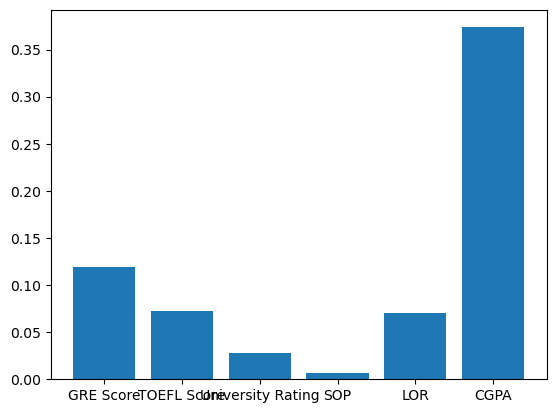

In [13]:
# Linear Regression 

import matplotlib.pyplot as plt

plt.bar(X_train.columns, lin_reg.coef_)

<BarContainer object of 6 artists>

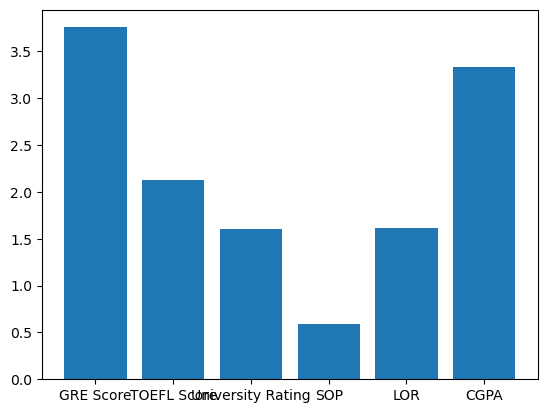

In [14]:
# Logistic Regression

plt.bar(X_train.columns, log_reg.coef_[0])

In [15]:
# Using insurance.csv dataset

import pandas as pd

data = pd.read_csv('insurance.csv')

# Show basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [16]:
data.head(10)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


In [17]:
data.head(10)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


In [19]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
data[['bmi']] = imputer.fit_transform(data[['bmi']])

# Select features and target (classification)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

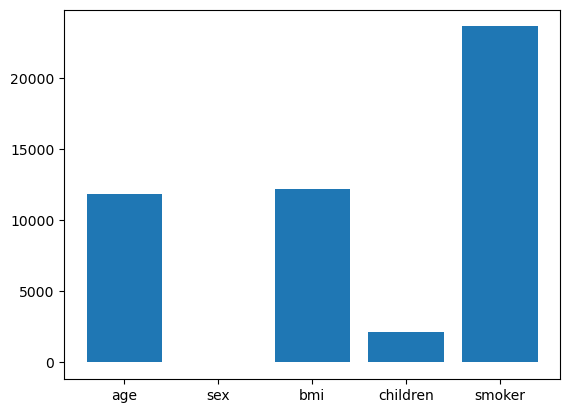

In [20]:
# training ver 3

# Standardize the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Derive coefficients
coefficients = model.coef_
feature_names = X_train.columns

# Plot coefficients
plt.bar(feature_names, coefficients)
plt.show()

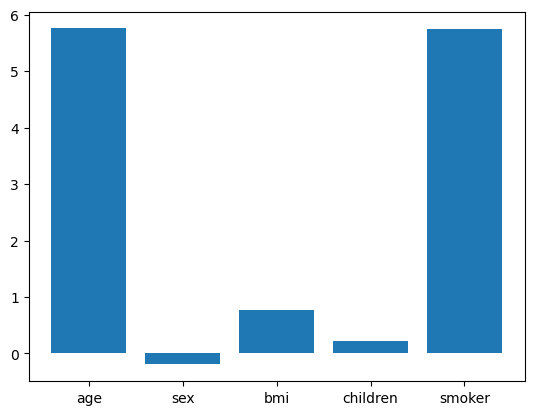

In [23]:
# training ver 4

data['high_cost'] = (data['charges'] > data['charges'].median()).astype(int)

X = data.drop(['charges', 'high_cost'], axis=1)
y = data['high_cost']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Derive coefficients
coefficients = model.coef_[0]
feature_names = X_train.columns

# Plot coefficients
plt.bar(feature_names, coefficients)
plt.show()

## Explainability in Tree-based Models

### Decision tree
- Fundamental block of tree-based models
- Used for regression and classification
- Tree-like structure for predictions
  - Several decisions
  - Each decision is based on one feature
- Inherently explainable

### Random forest
- Consists of many decision trees
- Used for regression and classification
- Complicates direct interpretability
- Feature importance
  - Measures reduction of uncertainty inpredictions
  - Different than coefficients in linearmodels


In [31]:
# Using admissions dataset

df = pd.read_csv('admission_data.csv')

# Handle missing values
imputer = SimpleImputer(strategy="mean")
df[['LOR']] = imputer.fit_transform(df[['LOR']])

# Select features and target (classification)
X = df.drop(['Accept'], axis=1)
y = df['Accept']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = data.drop(['Accept'], axis=1)
# y_train = data['Accept']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

print(tree_model.feature_importances_)

[0. 0. 0. 0. 0. 0. 1.]


In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

print(forest_model.feature_importances_)

[0.12848585 0.08036113 0.02558272 0.0188014  0.02587117 0.14524318
 0.57565455]


### Feature Importance

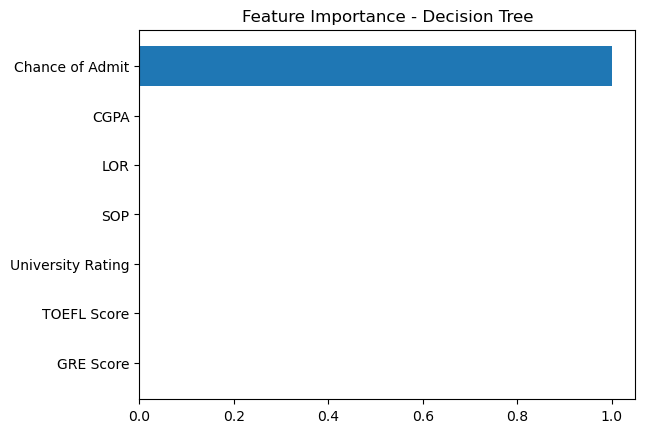

In [34]:
plt.barh(X_train.columns, tree_model.feature_importances_)
plt.title('Feature Importance - Decision Tree')
plt.show()

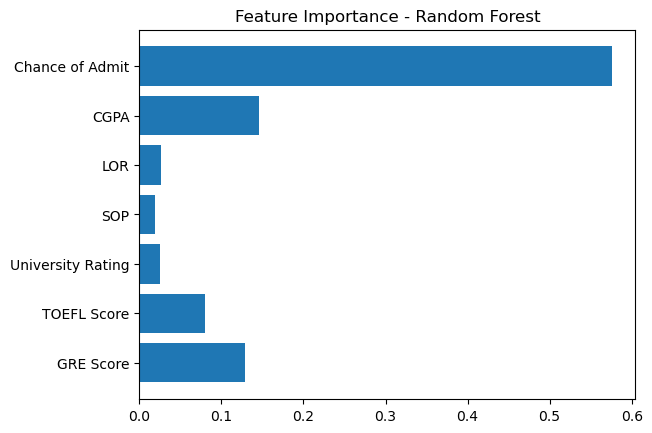

In [35]:
plt.barh(X_train.columns, forest_model.feature_importances_)
plt.title('Feature Importance - Random Forest')
plt.show()

In [38]:
# training ver 5

# Using heart.csv dataset

df1 = pd.read_csv('heart.csv')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [39]:
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


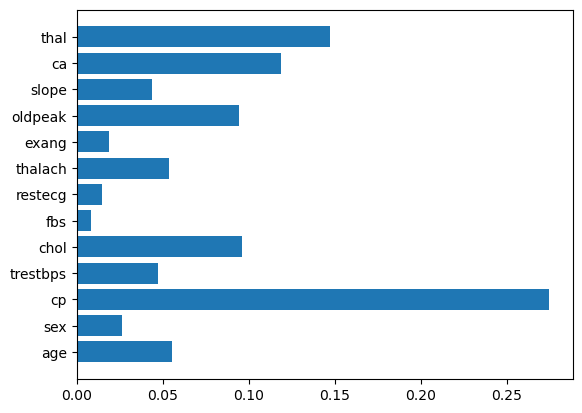

In [40]:
# Select features and target (classification)
X = df1.drop(['target'], axis=1)
y = df1['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Derive feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.barh(X_train.columns, feature_importances)
plt.show()

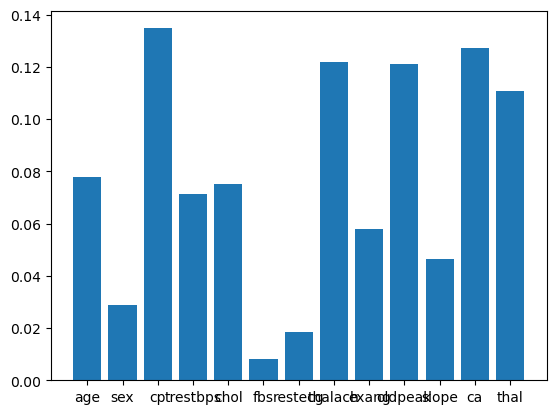

In [41]:
# training ver 6

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Derive feature importances
feature_importances = model.feature_importances_

# Plot the feature importances
plt.bar(X_train.columns, feature_importances)
plt.show()